In [1]:
import pandas as pd
import missingno as msno

data = pd.read_csv("../../data/data.csv")

In [12]:
len(data)

1203

<Axes: >

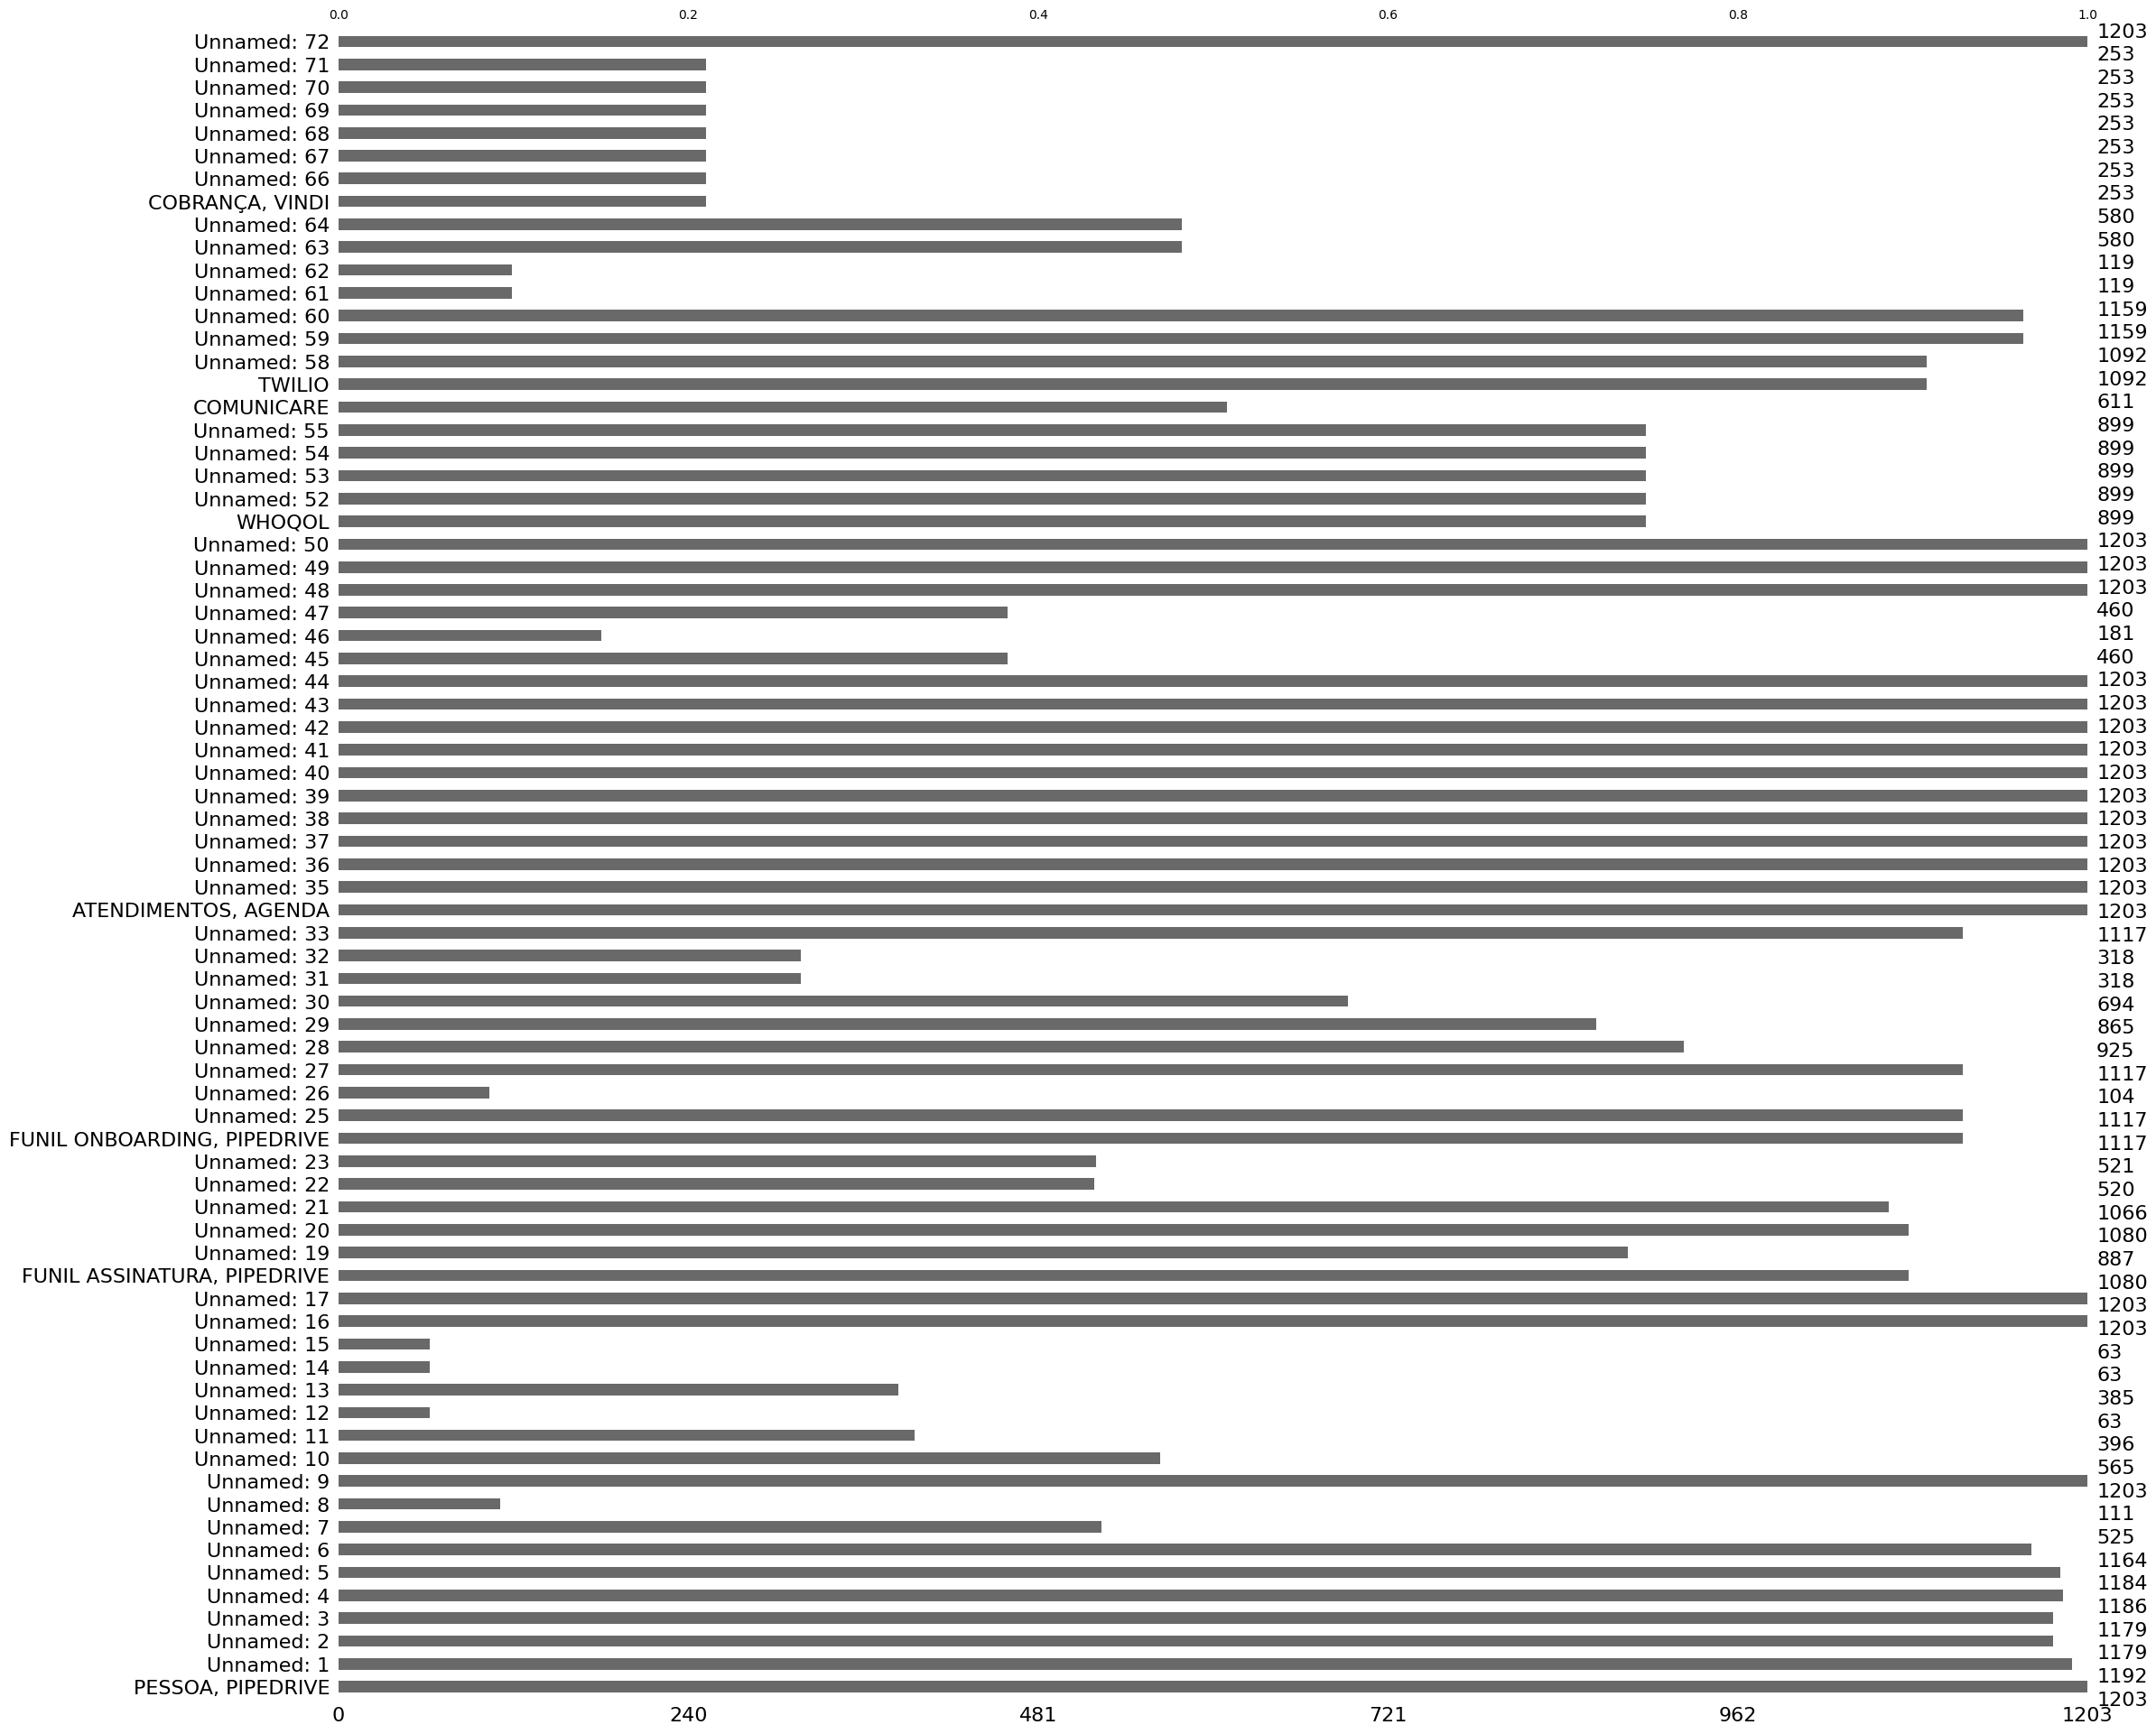

In [2]:
data = preprocessing(data)

In [3]:

from data_preprocessing import preprocessing

new_data = preprocessing(data)

<Axes: ylabel='0'>

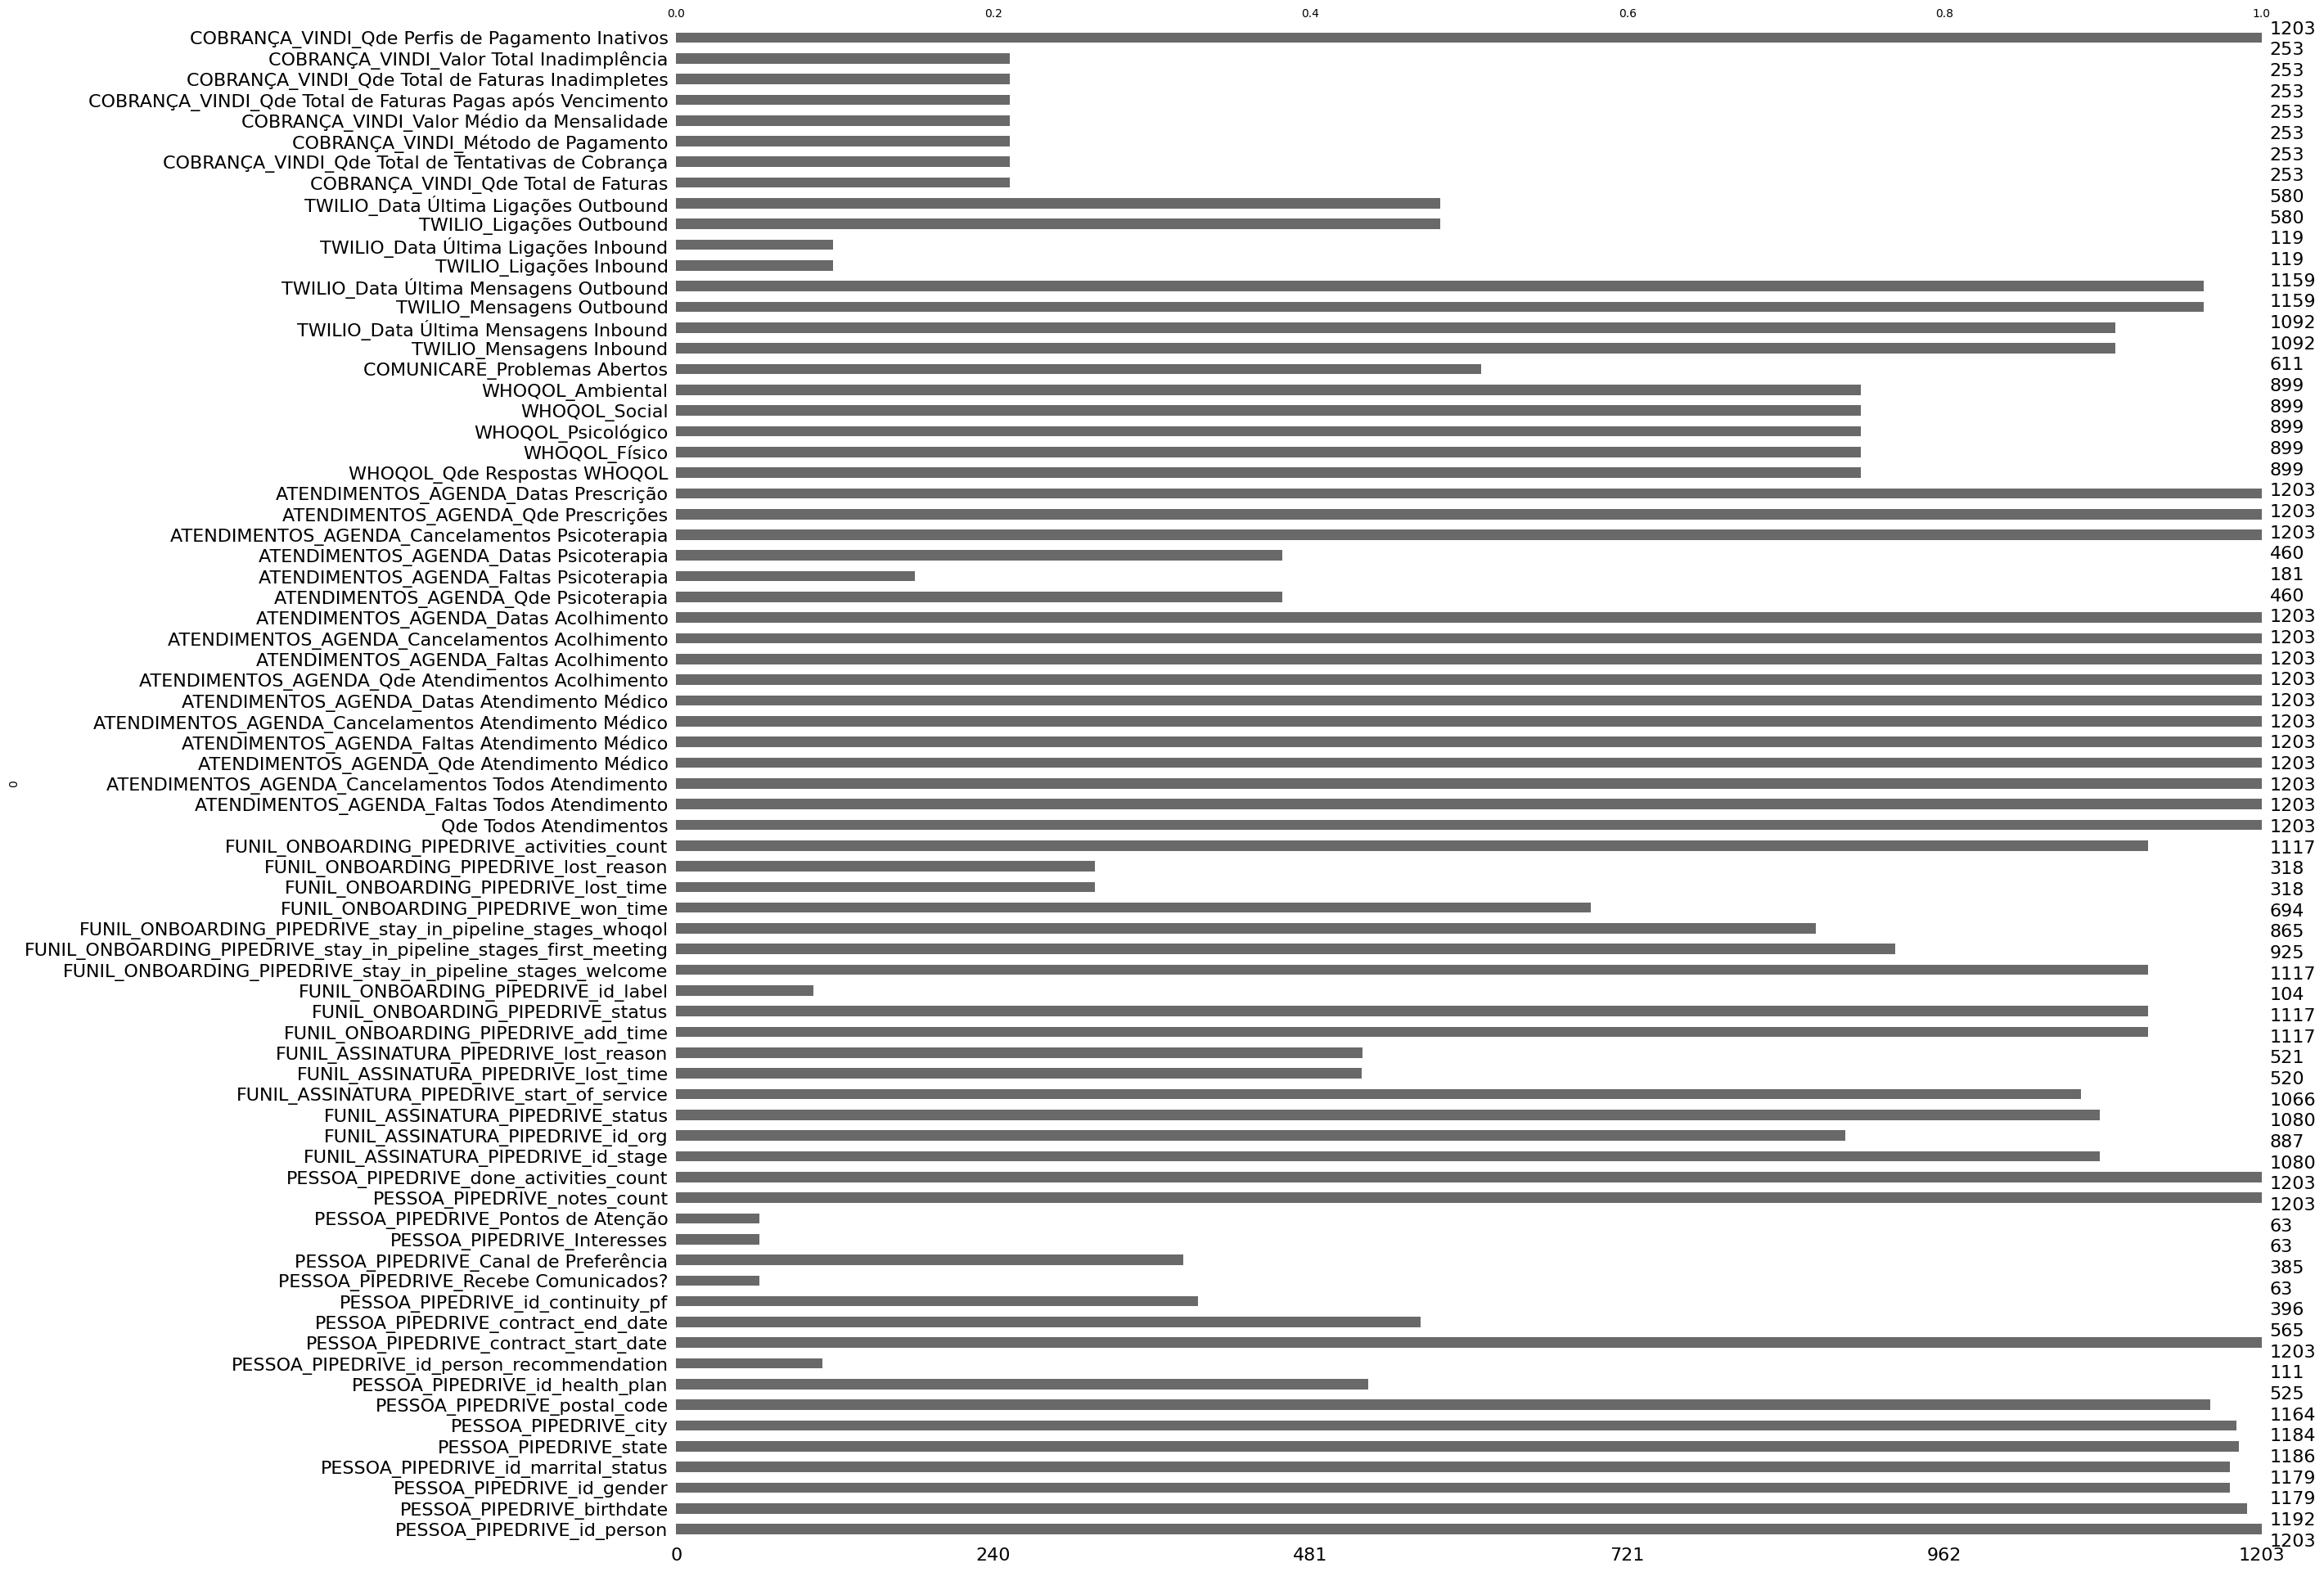

In [4]:
data.to_csv("data-preprocessed.csv", index=False)

In [5]:
import ssl
from urllib.request import urlopen

# Ignorar verificação de certificado SSL (não recomendado para produção)
ssl._create_default_https_context = ssl._create_unverified_context

# Seu código para abrir a URL aqui
response = urlopen('https://example.com')
print(response.read())


b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    

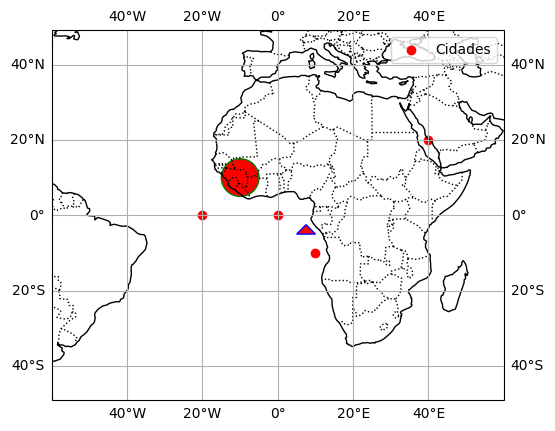

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Polygon, Circle

# Crie uma figura e eixos
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Adicione um fundo do mapa
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Adicione limites de latitude e longitude
ax.set_extent([-60, 60, -30, 30])

# Adicione alguns pontos no mapa (por exemplo, cidades)
lons = [0, 10, -20, 40]
lats = [0, -10, 0, 20]
ax.scatter(lons, lats, transform=ccrs.PlateCarree(), color='red', marker='o', label='Cidades')

# Adicione um triângulo
triangle_coords = [(5, -5), (10, -5), (7.5, -2.5)]
triangle = Polygon(triangle_coords, edgecolor='blue', facecolor='red', transform=ccrs.PlateCarree())
ax.add_patch(triangle)

# Adicione um círculo
circle = Circle((-10, 10), 5, edgecolor='green', facecolor='red', transform=ccrs.PlateCarree())
ax.add_patch(circle)

# Adicione grade de coordenadas
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Adicione uma legenda
ax.legend()

# Mostre o gráfico
plt.show()


In [7]:
len(new_data)

974